    Abgabe Marquardt 3706017 Data Exploration Project

In [1]:
# imports

import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import chi2, f_classif, SelectKBest, RFE
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, classification_report

     START EXPLORATION

In [2]:
# Datensatz laden
path = "mushrooms.csv"
mushroom_data = pd.read_csv(path)

In [3]:
# Die ersten Zeilen des Datensatzes anzeigen
print(mushroom_data.head())

  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1       

In [4]:
# Die Spaltennamen des Datensatzes anzeigen
print(mushroom_data.columns)

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


In [5]:
# Allgemeine Informationen über den Datensatz anzeigen
print(mushroom_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
# Statistische Zusammenfassung des Datensatzes anzeigen
print(mushroom_data.describe())

       class cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count   8124      8124        8124      8124    8124  8124            8124   
unique     2         6           4        10       2     9               2   
top        e         x           y         n       f     n               f   
freq    4208      3656        3244      2284    4748  3528            7914   

       gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
count          8124      8124       8124  ...                     8124   
unique            2         2         12  ...                        4   
top               c         b          b  ...                        s   
freq           6812      5612       1728  ...                     4936   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8124                   8124      8124       8124   
unique                      9                      9         1          4   
top    

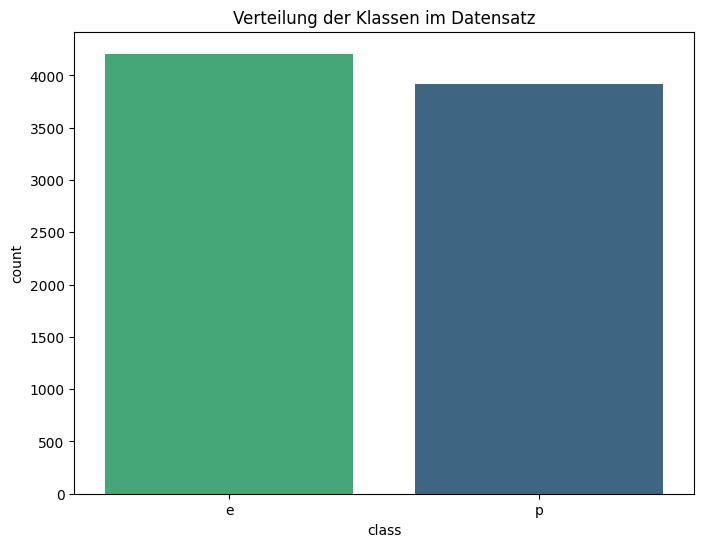

In [7]:
# Die Häufigkeit der Klassen ermitteln und nach Größe sortieren
class_counts = mushroom_data['class'].value_counts().sort_values(ascending=False).index

# Visualisierung der Verteilung der Klassen
plt.figure(figsize=(8, 6))
sns.countplot(x='class', hue='class', data=mushroom_data, palette='viridis', order=class_counts, legend=False)
plt.title('Verteilung der Klassen im Datensatz')
plt.show()

In [8]:
# Übersicht über die am häufigsten vorkommenden Ausprägungen der Pilz-Eigenschaften
print("Häufigkeit der Ausprägungen der Pilz-Eigenschaften:")
for col in mushroom_data.columns:
    if col != 'class':
        print(f"{col}:\n{mushroom_data[col].value_counts()}\n")

Häufigkeit der Ausprägungen der Pilz-Eigenschaften:
cap-shape:
cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: count, dtype: int64

cap-surface:
cap-surface
y    3244
s    2556
f    2320
g       4
Name: count, dtype: int64

cap-color:
cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: count, dtype: int64

bruises:
bruises
f    4748
t    3376
Name: count, dtype: int64

odor:
odor
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: count, dtype: int64

gill-attachment:
gill-attachment
f    7914
a     210
Name: count, dtype: int64

gill-spacing:
gill-spacing
c    6812
w    1312
Name: count, dtype: int64

gill-size:
gill-size
b    5612
n    2512
Name: count, dtype: int64

gill-color:
gill-color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: count, dtype: int64

stalk-shape:
sta

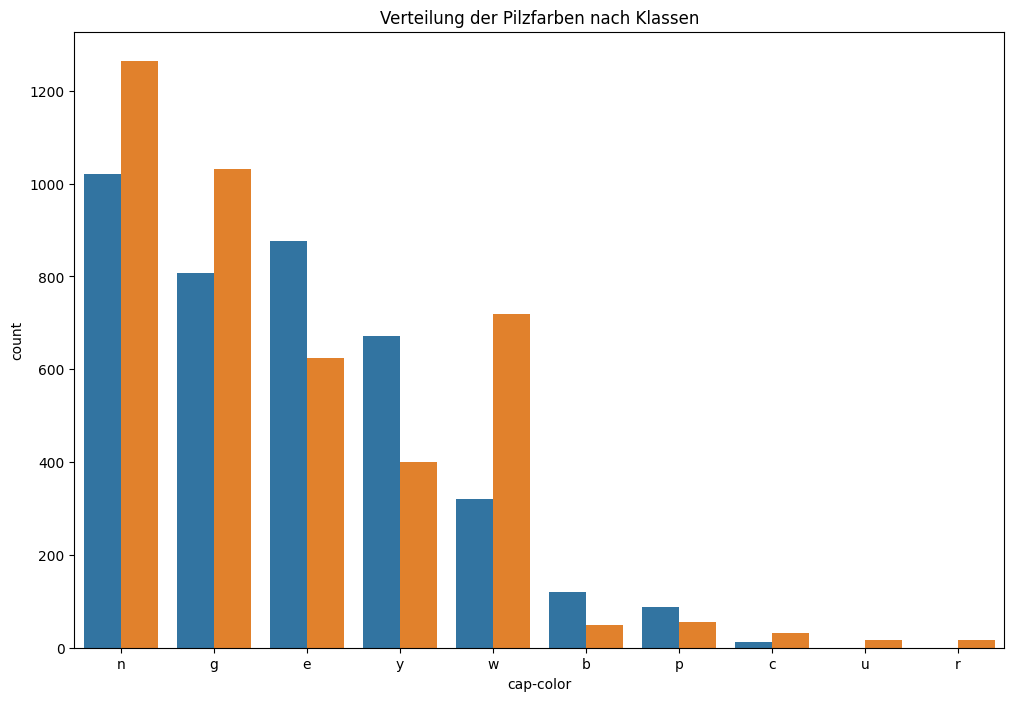

In [9]:
# Die Häufigkeit der Klassen ermitteln und nach Größe sortieren
cap_color_counts = mushroom_data['cap-color'].value_counts().sort_values(ascending=False).index

# Visualisierung der Verteilung von Pilzfarben nach Klassen
plt.figure(figsize=(12, 8))
sns.countplot(x='cap-color', hue='class', data=mushroom_data, order=cap_color_counts, legend=False)
plt.title('Verteilung der Pilzfarben nach Klassen')
plt.show()

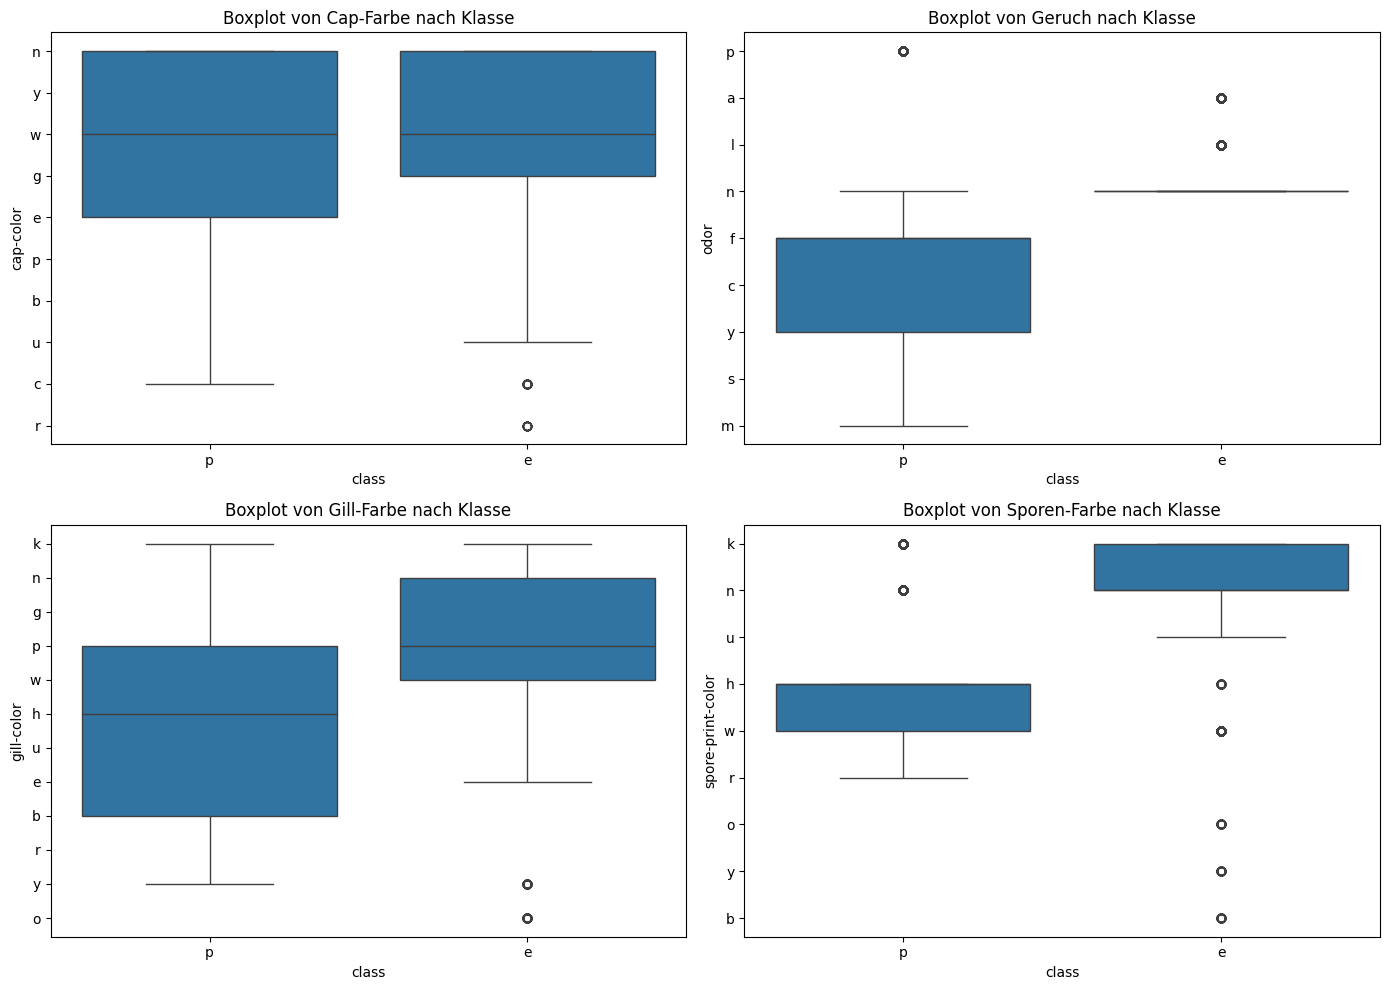

In [10]:
# Boxplots für ausgewählte Merkmale erstellen
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
sns.boxplot(x='class', y='cap-color', data=mushroom_data)
plt.title('Boxplot von Cap-Farbe nach Klasse')

plt.subplot(2, 2, 2)
sns.boxplot(x='class', y='odor', data=mushroom_data)
plt.title('Boxplot von Geruch nach Klasse')

plt.subplot(2, 2, 3)
sns.boxplot(x='class', y='gill-color', data=mushroom_data)
plt.title('Boxplot von Gill-Farbe nach Klasse')

plt.subplot(2, 2, 4)
sns.boxplot(x='class', y='spore-print-color', data=mushroom_data)
plt.title('Boxplot von Sporen-Farbe nach Klasse')

plt.tight_layout()
plt.show()

     START MACHINELLES LERNEN
    

In [11]:
X=mushroom_data.drop('class', axis=1) 
y=mushroom_data['class'] 
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


Aufteilung Datensatz

In [12]:
Encoder_X = LabelEncoder() 
for col in X.columns:
    X[col] = Encoder_X.fit_transform(X[col])

Encoder_y = LabelEncoder()
y = Encoder_y.fit_transform(y)

X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=100)
print(f"Number of samples for training set:{X_train.shape}")
print(f"Number of samples for test set:{X_test.shape}")

Number of samples for training set:(6499, 22)
Number of samples for test set:(1625, 22)


Selected Features: Index(['bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size',
       'stalk-root', 'stalk-surface-above-ring', 'veil-color', 'ring-number',
       'ring-type'],
      dtype='object')


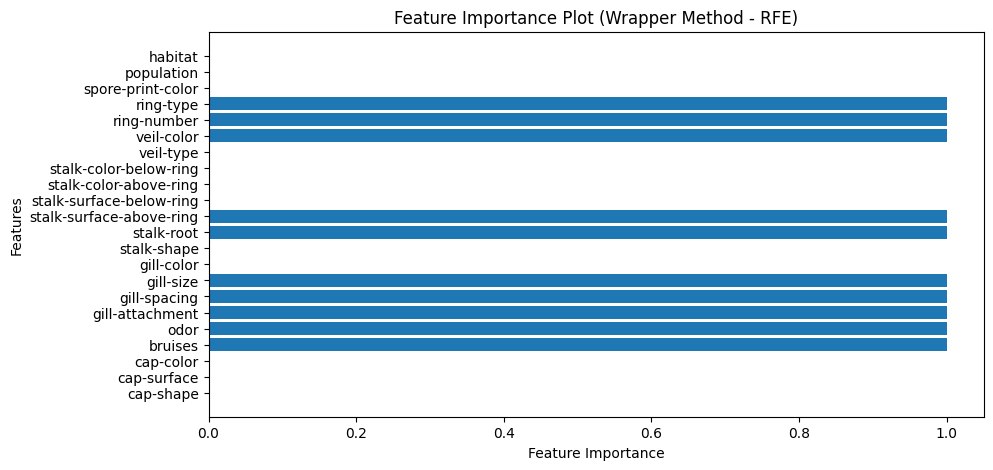

In [13]:
warnings.filterwarnings("ignore")
logreg = LogisticRegression()

# Feature selection using Recursive Feature Elimination (RFE)
rfe = RFE(estimator=logreg, n_features_to_select=10, step=1)
rfe.fit(X_train, Y_train)

selected_features = X.columns[rfe.support_]

# Print selected features
print("Selected Features:", selected_features)
# Plotting feature importance with Recursive Feature Elimination
plt.figure(figsize=(10, 5))
plt.barh(range(len(rfe.support_)), rfe.support_)
plt.yticks(range(len(X.columns)), X.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot (Wrapper Method - RFE)')
plt.show()

Top 10 features based on Fisher score: ['population', 'stalk-surface-below-ring', 'stalk-surface-above-ring', 'gill-spacing', 'stalk-root', 'ring-type', 'bruises', 'gill-color', 'gill-size', 'veil-type']


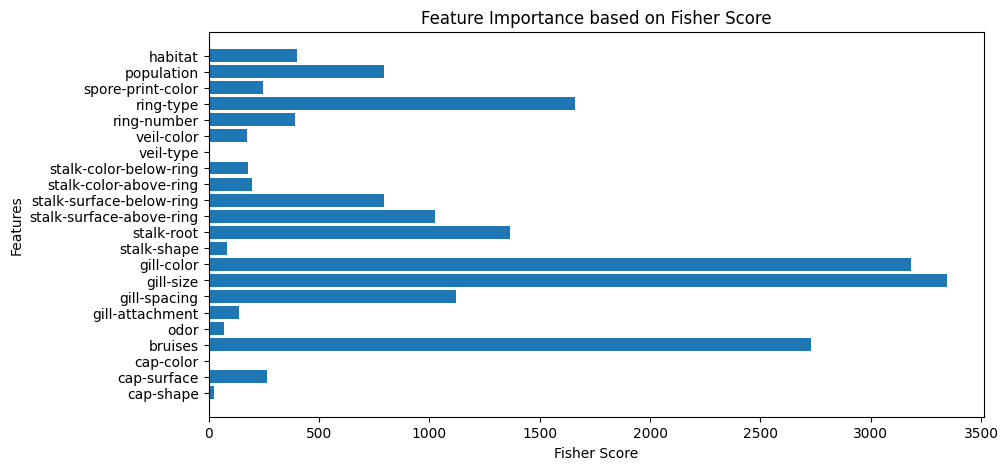

In [14]:
# Calculate Fisher score
fisher_scores, _ = f_classif(X, y)

# Get top features based on score
top_fisher_features = [X.columns[i] for i in np.argsort(fisher_scores)[-10:]]
print("Top 10 features based on Fisher score:", top_fisher_features)

# Plotting Fisher score feature importance
plt.figure(figsize=(10, 5))
plt.barh(range(len(fisher_scores)), fisher_scores)
plt.yticks(range(len(X.columns)), X.columns)
plt.xlabel('Fisher Score')
plt.ylabel('Features')
plt.title('Feature Importance based on Fisher Score')
plt.show()

Top 10 features based on chi-square: ['population', 'spore-print-color', 'habitat', 'gill-spacing', 'stalk-root', 'bruises', 'gill-size', 'ring-type', 'gill-color', 'veil-type']


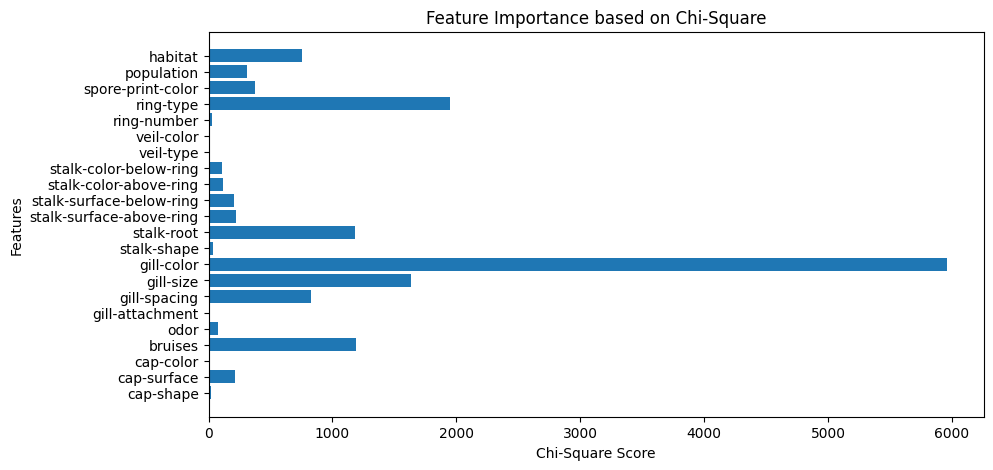

In [15]:
# Calculate chi-square-score
chi2_scores, _ = chi2(X, y)

# Get top features based on score
top_chi2_features = [X.columns[i] for i in np.argsort(chi2_scores)[-10:]]
print("Top 10 features based on chi-square:", top_chi2_features)

# Plotting chi-square feature importance 
plt.figure(figsize=(10, 5))
plt.barh(range(len(chi2_scores)), chi2_scores)
plt.yticks(range(len(X.columns)), X.columns)
plt.xlabel('Chi-Square Score')
plt.ylabel('Features')
plt.title('Feature Importance based on Chi-Square')
plt.show()

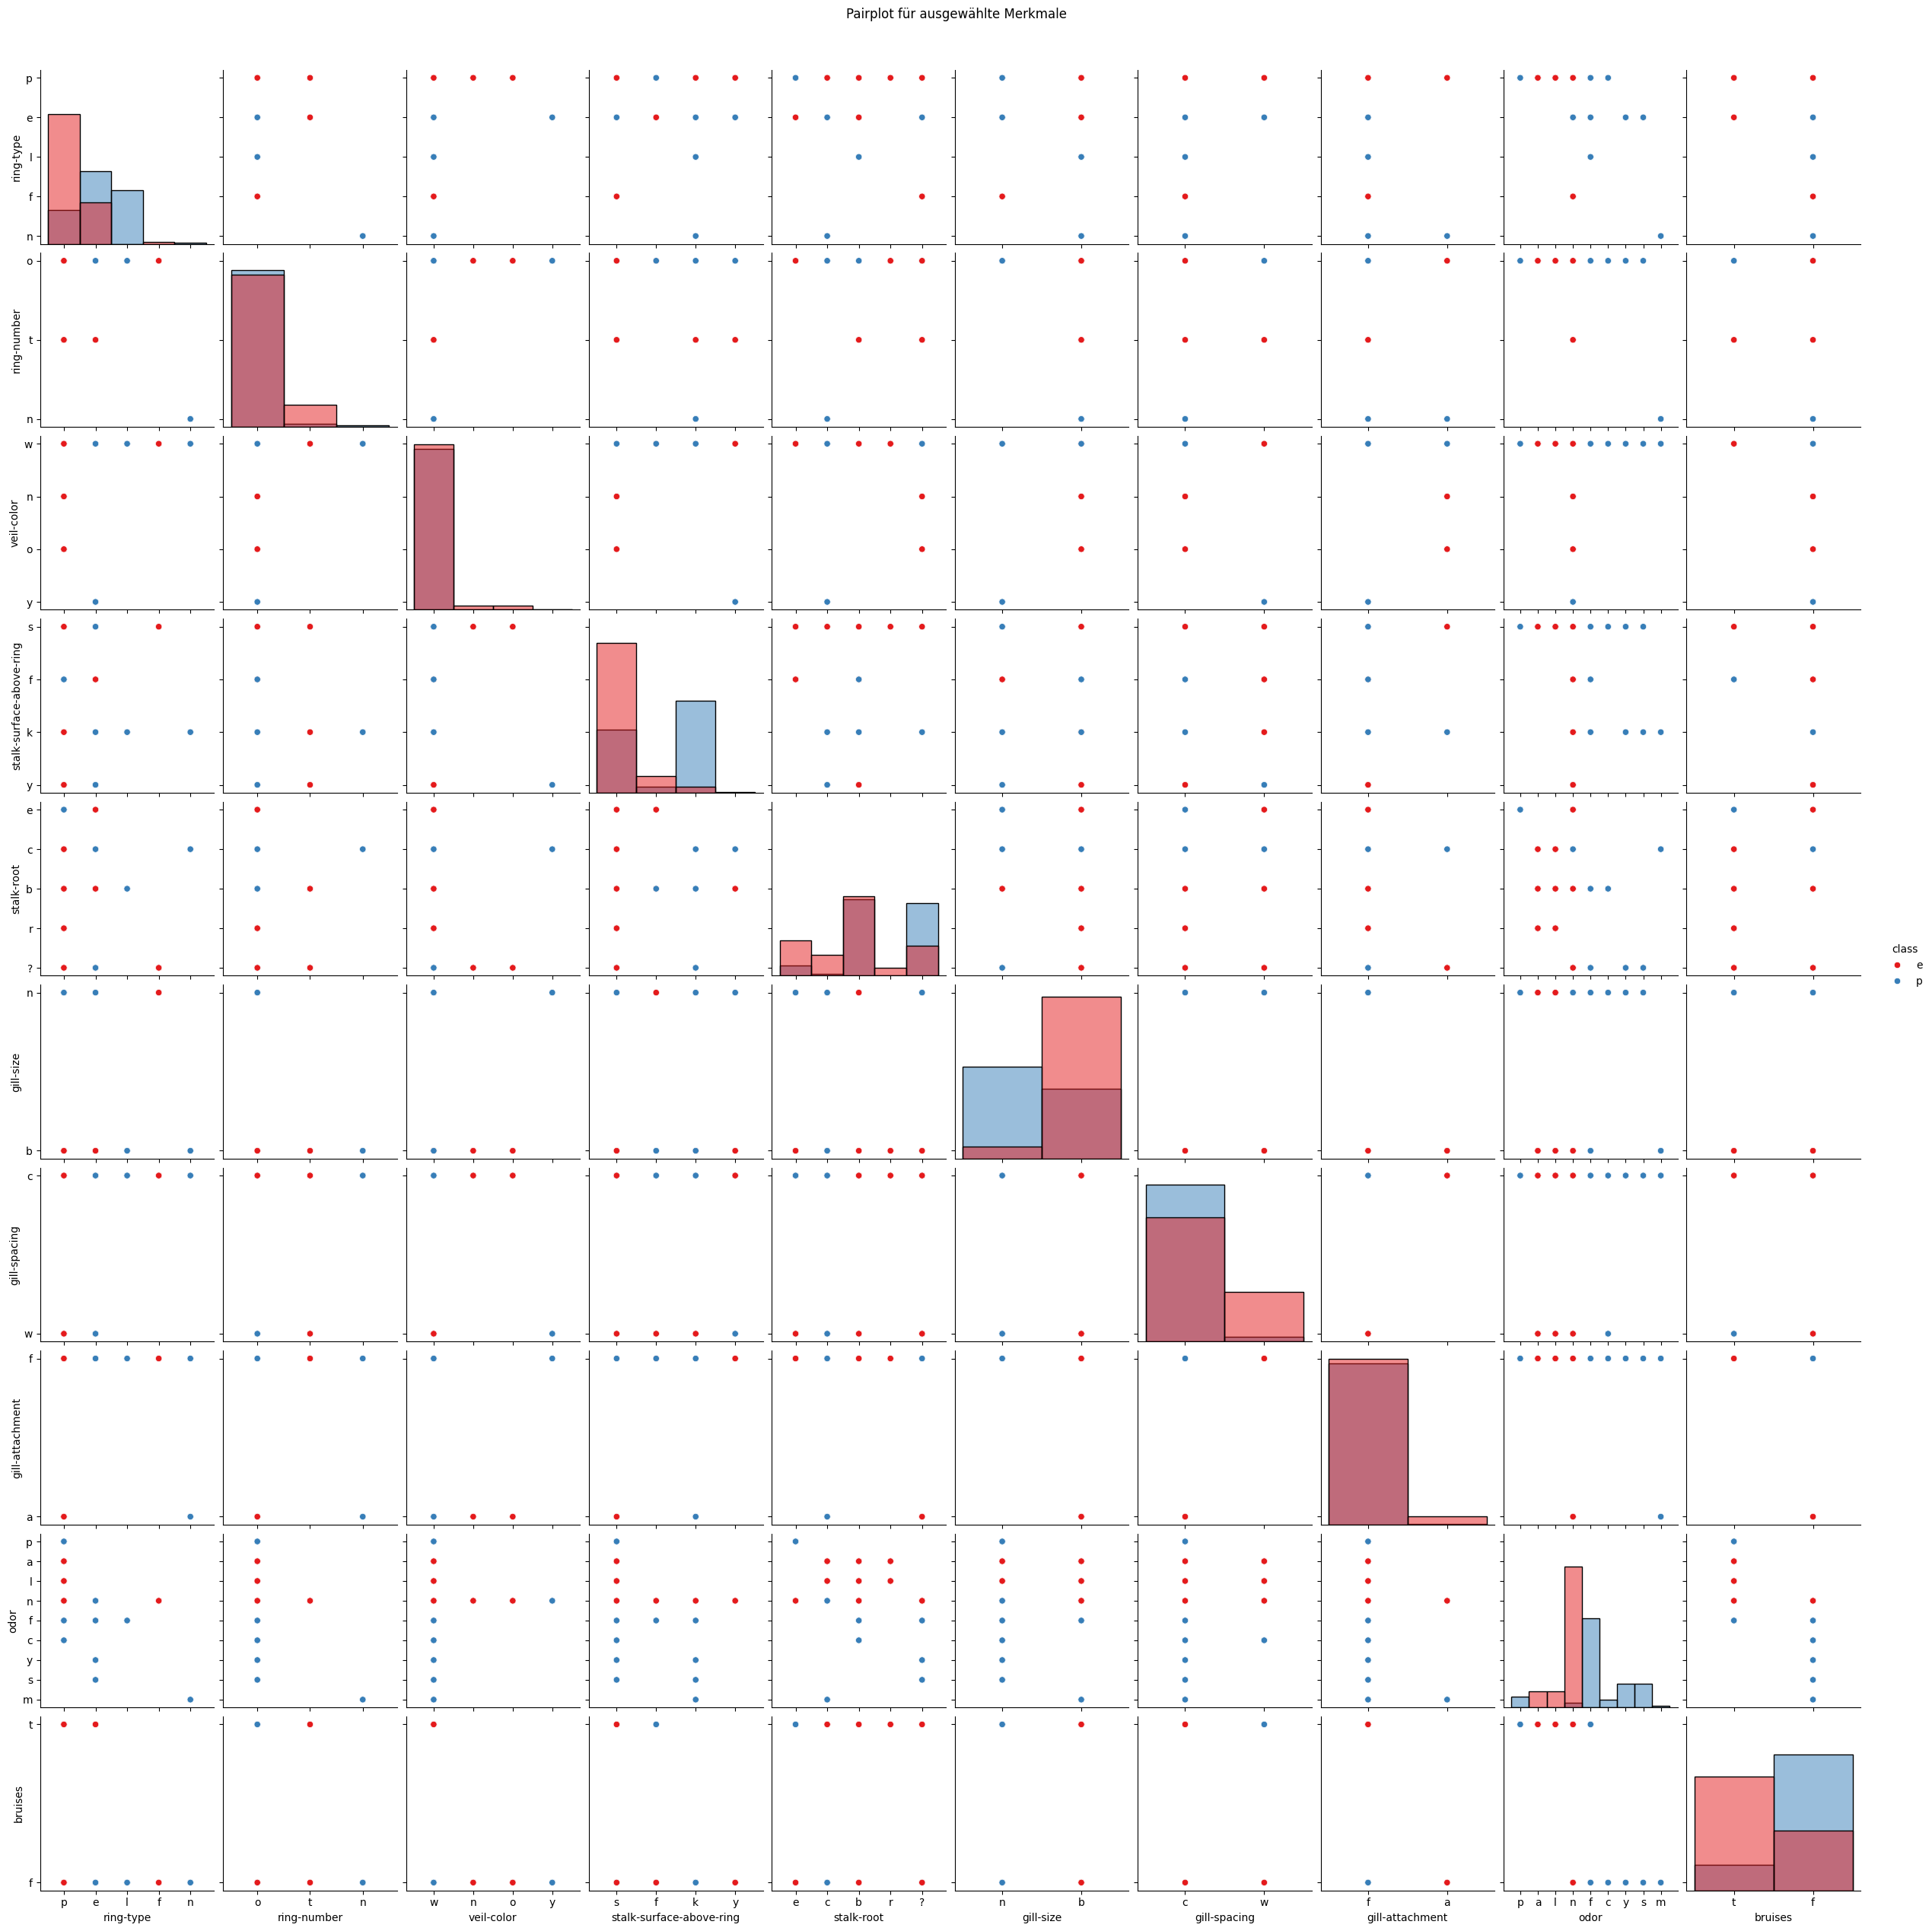

In [16]:
# Paarplot für alle RFE-Merkmale
selected_features = ['ring-type', 'ring-number', 'veil-color', 'stalk-surface-above-ring', 'stalk-root',
       'gill-size', 'gill-spacing', 'gill-attachment', 'odor', 'bruises']

# Stelle sicher, dass 'class' eine kategoriale Variable ist
mushroom_data['class'] = mushroom_data['class'].astype('category')

# Färbe die Punkte entsprechend der Zielklasse ein
sns.pairplot(data=mushroom_data, vars=selected_features, hue='class', palette='Set1', diag_kind='hist')

plt.suptitle('Pairplot für ausgewählte Merkmale', y=1.02)
plt.show()

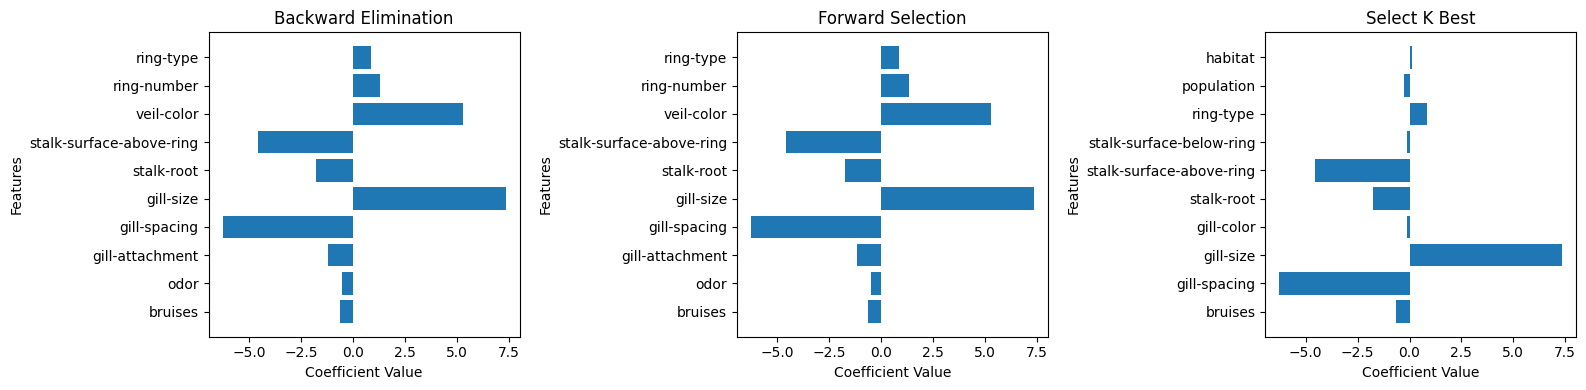

In [17]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

# Backward Elimination using RFE
selector_backward = RFE(estimator=logreg, n_features_to_select=10, step=1)
X_backward_selected = selector_backward.fit_transform(X, y)
backward_selected_features = X.columns[selector_backward.support_]

# Forward Selection using RFE
selector_forward = RFE(estimator=logreg, n_features_to_select=10, step=1)
X_forward_selected = selector_forward.fit_transform(X, y)
forward_selected_features = X.columns[selector_forward.support_]

# Select K Best Features
selector_k_best = SelectKBest(score_func=f_classif, k=10)
X_k_best_selected = selector_k_best.fit_transform(X, y)
k_best_selected_features = X.columns[selector_k_best.get_support()]

# Plotting
plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
plt.barh(range(len(backward_selected_features)), logreg.coef_[0][selector_backward.support_])
plt.yticks(range(len(backward_selected_features)), backward_selected_features)
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Backward Elimination')

plt.subplot(1, 3, 2)
plt.barh(range(len(forward_selected_features)), logreg.coef_[0][selector_forward.support_])
plt.yticks(range(len(forward_selected_features)), forward_selected_features)
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Forward Selection')

plt.subplot(1, 3, 3)
plt.barh(range(len(k_best_selected_features)), logreg.coef_[0][selector_k_best.get_support()])
plt.yticks(range(len(k_best_selected_features)), k_best_selected_features)
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Select K Best')

plt.tight_layout()
plt.show()

In [18]:
'''
kNN und Error-Rate für jedes kNN
'''

# Definieren Sie eine Liste von k-Werten, die Sie untersuchen möchten
k_values = list(range(1, 101))

# Initialisieren Sie eine leere Liste, um die Genauigkeiten für jedes k zu speichern
accuracies = []

# Iterieren Sie über die k-Werte
for k in k_values:
    # Initialisieren Sie den kNN-Klassifikator mit dem aktuellen k-Wert
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Trainieren Sie den Klassifikator auf den Trainingsdaten
    knn.fit(X_train, Y_train)
    
    # Machen Sie Vorhersagen auf den Testdaten
    y_pred = knn.predict(X_test)
    
    # Berechnen Sie die Genauigkeit und speichern Sie sie
    accuracy = accuracy_score(Y_test, y_pred)
    accuracies.append(accuracy)

# Ausgabe der Genauigkeiten für jeden k-Wert
for k, accuracy in zip(k_values, accuracies):
    print(f"k = {k} -> Genauigkeit = {accuracy}")


k = 1 -> Genauigkeit = 1.0
k = 2 -> Genauigkeit = 1.0
k = 3 -> Genauigkeit = 0.9993846153846154
k = 4 -> Genauigkeit = 0.9987692307692307
k = 5 -> Genauigkeit = 0.9987692307692307
k = 6 -> Genauigkeit = 0.9981538461538462
k = 7 -> Genauigkeit = 0.9981538461538462
k = 8 -> Genauigkeit = 0.9981538461538462
k = 9 -> Genauigkeit = 0.9975384615384615
k = 10 -> Genauigkeit = 0.9981538461538462
k = 11 -> Genauigkeit = 0.9981538461538462
k = 12 -> Genauigkeit = 0.9950769230769231
k = 13 -> Genauigkeit = 0.9963076923076923
k = 14 -> Genauigkeit = 0.9944615384615385
k = 15 -> Genauigkeit = 0.9950769230769231
k = 16 -> Genauigkeit = 0.9944615384615385
k = 17 -> Genauigkeit = 0.9950769230769231
k = 18 -> Genauigkeit = 0.9938461538461538
k = 19 -> Genauigkeit = 0.9944615384615385
k = 20 -> Genauigkeit = 0.9926153846153846
k = 21 -> Genauigkeit = 0.9932307692307693
k = 22 -> Genauigkeit = 0.992
k = 23 -> Genauigkeit = 0.992
k = 24 -> Genauigkeit = 0.9907692307692307
k = 25 -> Genauigkeit = 0.9907692

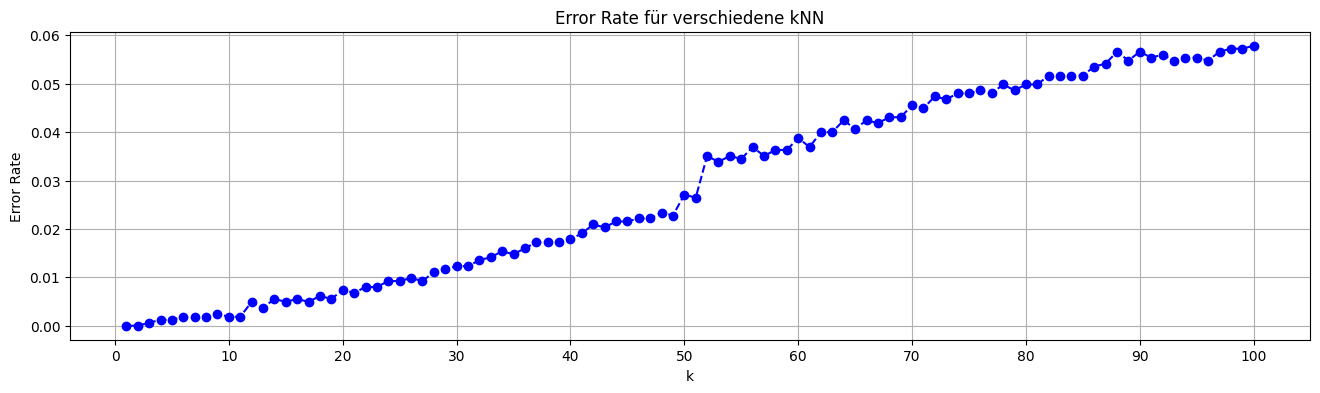

In [19]:
# Plot der Error-Rate für jedes k
plt.figure(figsize=(16, 4))
plt.plot(k_values, [1 - accuracy for accuracy in accuracies], marker='o', linestyle='--', color='b')
plt.title('Error Rate für verschiedene kNN')
plt.xlabel('k')
plt.ylabel('Error Rate')

# Setzen der x-Achsen-Beschriftung in Schritten
plt.xticks(range(0, 101, 10))
plt.grid(True)
plt.show()

In [20]:
'''
XGBoost und Error-Rate für jeden Booster
'''

# Definieren Sie eine Liste von Booster-Parametern, die Sie untersuchen möchten
booster_params = {'max_depth': [3, 5, 7], 'learning_rate': [0.1, 0.01, 0.001]}

# Initialisieren Sie eine leere Liste, um die Genauigkeiten für jeden Booster zu speichern
accuracies = []

# Iterieren Sie über die Booster-Parameter
for max_depth in booster_params['max_depth']:
    for learning_rate in booster_params['learning_rate']:
        # Initialisieren Sie den XGBoost-Klassifikator mit den aktuellen Parametern
        xgb_classifier = xgb.XGBClassifier(max_depth=max_depth, learning_rate=learning_rate)
        
        # Trainieren Sie den Klassifikator auf den Trainingsdaten
        xgb_classifier.fit(X_train, Y_train)
        
        # Machen Sie Vorhersagen auf den Testdaten
        y_pred = xgb_classifier.predict(X_test)
        
        # Berechnen Sie die Genauigkeit und speichern Sie sie
        accuracy = accuracy_score(Y_test, y_pred)
        accuracies.append(accuracy)

# Ausgabe der Genauigkeiten für jeden Booster
for i, (max_depth, learning_rate) in enumerate(zip(booster_params['max_depth'], booster_params['learning_rate'])):
    print(f"Booster {i+1}: max_depth = {max_depth}, learning_rate = {learning_rate}, Genauigkeit = {accuracies[i]}")


Booster 1: max_depth = 3, learning_rate = 0.1, Genauigkeit = 1.0
Booster 2: max_depth = 5, learning_rate = 0.01, Genauigkeit = 0.9778461538461538
Booster 3: max_depth = 7, learning_rate = 0.001, Genauigkeit = 0.924923076923077


Genauigkeit der Booster: 1 - Summe der Fehler jeweils von max_depth von 3, 5 und 7

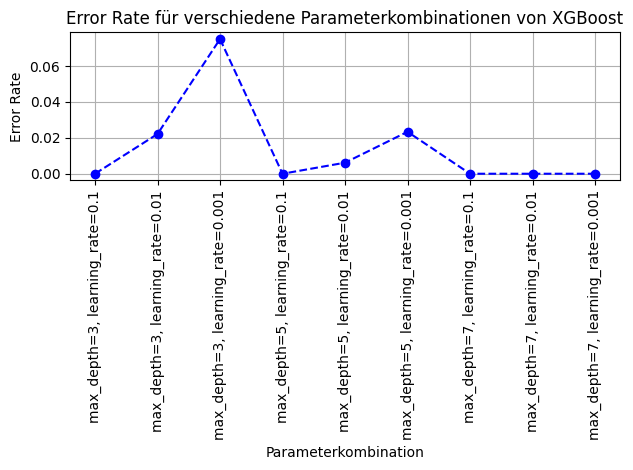

In [21]:
# Initialisieren Sie eine leere Liste, um die Error-Raten für jede Parameterkombination zu speichern
error_rates = []

# Iterieren Sie über die Booster-Parameter
for max_depth in booster_params['max_depth']:
    for learning_rate in booster_params['learning_rate']:
        # Initialisieren Sie den XGBoost-Klassifikator mit den aktuellen Parametern
        xgb_classifier = xgb.XGBClassifier(max_depth=max_depth, learning_rate=learning_rate)
        
        # Trainieren Sie den Klassifikator auf den Trainingsdaten
        xgb_classifier.fit(X_train, Y_train)
        
        # Machen Sie Vorhersagen auf den Testdaten
        y_pred = xgb_classifier.predict(X_test)
        
        # Berechnen Sie die Error-Rate und speichern Sie sie
        error_rate = 1 - accuracy_score(Y_test, y_pred)
        error_rates.append(error_rate)

# Plot der Error-Rate für jede Parameterkombination
plt.plot(range(len(error_rates)), error_rates, marker='o', linestyle='--', color='b')
plt.title('Error Rate für verschiedene Parameterkombinationen von XGBoost')
plt.xlabel('Parameterkombination')
plt.ylabel('Error Rate')

# Setzen der x-Achsen-Beschriftung
plt.xticks(range(len(error_rates)), [f"max_depth={max_depth}, learning_rate={learning_rate}" 
                                      for max_depth in booster_params['max_depth'] 
                                      for learning_rate in booster_params['learning_rate']], rotation=90)

plt.grid(True)
plt.tight_layout()
plt.show()

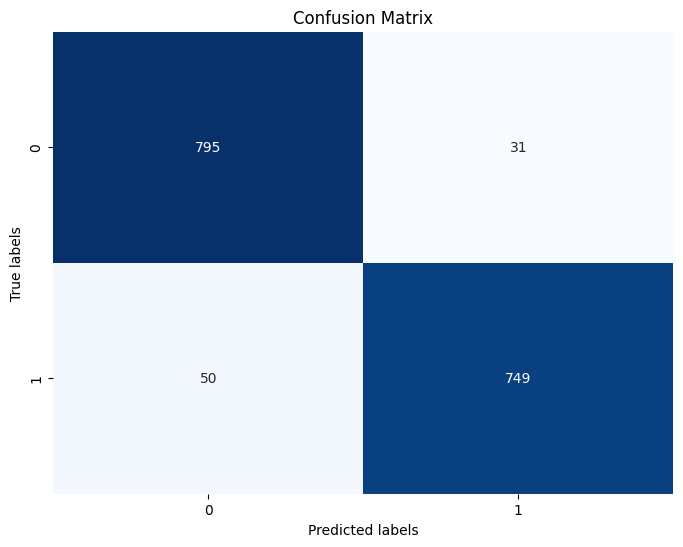

In [22]:
# Make predictions on the test set
y_pred = logreg.predict(X_test)

cm = confusion_matrix(Y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [23]:
# Spalten mit kategorialen Daten identifizieren
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Spalten-Transformer erstellen
preprocessor = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), categorical_columns)],
    remainder='passthrough'
)

# Daten transformieren
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Initialisiere das GridSearchCV-Objekt
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='neg_mean_squared_error')

# Führe das Hyperparameter-Tuning durch
grid_search.fit(X_train_encoded, Y_train)

# Zeige die besten Hyperparameter an
best_alpha = grid_search.best_params_['C']
print(f"Bestes C: {best_alpha}")

# Vorhersagen auf dem Testset machen
y_pred = grid_search.predict(X_test_encoded)

# Evaluierung des Modells
mse = mean_squared_error(Y_test, y_pred)
print(f"Mean Squared Error auf dem Testset: {mse}")

Bestes C: 100
Mean Squared Error auf dem Testset: 0.039384615384615386


In [24]:
# Schwellenwert (Threshold) für die Klassenzuweisung festlegen
threshold = 0.1 # Beispielwert, du kannst ihn anpassen

# Vorhersagen auf dem Testset mit dem festgelegten Schwellenwert machen
y_pred_binary = (y_pred > threshold).astype(int)

# Klassifikationsreport ausgeben
print("\nKlassifikationsreport:")
print(classification_report(Y_test, y_pred_binary))


Klassifikationsreport:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       826
           1       0.96      0.95      0.96       799

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625



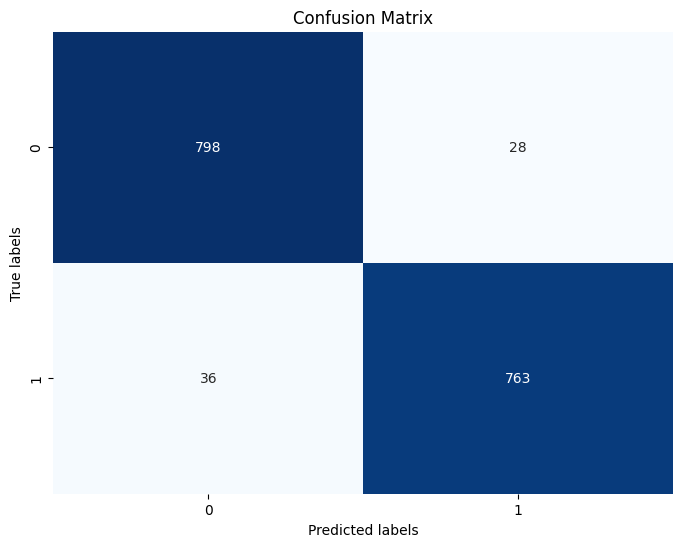

In [25]:
cm = confusion_matrix(Y_test, y_pred_binary)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [26]:
# --- Initialisieren und Trainieren des Random Forest-Klassifikators --- #

# Features (X) und Labels (y) extrahieren
X = mushroom_data.drop('class', axis=1)
y = mushroom_data['class']

# Aufteilen des Datensatzes in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Spalten mit kategorialen Daten identifizieren
categorical_columns = X.select_dtypes(include=['object']).columns

# Spalten-Transformer erstellen
preprocessor = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), categorical_columns)],
    remainder='passthrough'
)

# Daten transformieren
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

# Initialisieren und Trainieren des Random Forest-Klassifikators
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_encoded, y_train)

# Vorhersagen auf den Testdaten machen
y_pred = rf_classifier.predict(X_test_encoded)

# Evaluierung des Modells auf den Testdaten
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Anzeigen der Ergebnisse
print(f'Genauigkeit des Modells: {accuracy:.4f}\n')
print('\nKlassifikationsbericht:')
print(classification_rep)

# Konfusionsmatrix erstellen
cm = confusion_matrix(y_test, y_pred)

Genauigkeit des Modells: 1.0000


Klassifikationsbericht:
              precision    recall  f1-score   support

           e       1.00      1.00      1.00       843
           p       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



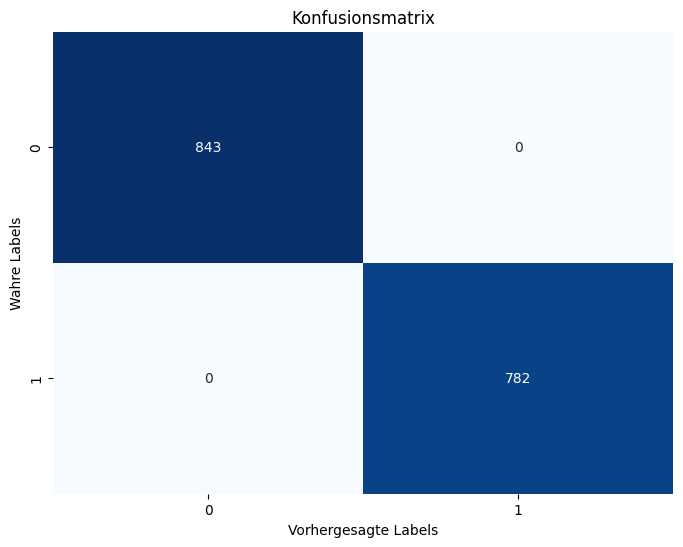

In [27]:
# Konfusionsmatrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Vorhergesagte Labels')
plt.ylabel('Wahre Labels')
plt.title('Konfusionsmatrix')
plt.show()

Kann man ma machen, muss aber nicht - Beispielcode für Hyperparametrisierung

In [28]:
# Hyperparameter-Raster erstellen
param_grid = {
    'n_estimators': [1, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialisieren des Random Forest-Klassifikators
rf_classifier = RandomForestClassifier(random_state=42)

# GridSearchCV für Hyperparameter-Tuning
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_encoded, y_train)

# Beste Hyperparameter anzeigen
best_params = grid_search.best_params_
print(f'Beste Hyperparameter: {best_params}')

# Modell mit den besten Hyperparametern erstellen und trainieren
best_rf_classifier = RandomForestClassifier(random_state=42, **best_params)
best_rf_classifier.fit(X_train_encoded, y_train)

# Vorhersagen auf den Testdaten machen
y_pred_tuned = best_rf_classifier.predict(X_test_encoded)

# Evaluierung des Modells auf den Testdaten
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)
classification_rep_tuned = classification_report(y_test, y_pred_tuned)

# Anzeigen der Ergebnisse nach Hyperparameter-Tuning
print(f'Genauigkeit des Modells nach Hyperparameter-Tuning: {accuracy_tuned:.4f}\n')
print('\nKlassifikationsbericht nach Hyperparameter-Tuning:')
print(classification_rep_tuned)


Beste Hyperparameter: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Genauigkeit des Modells nach Hyperparameter-Tuning: 1.0000


Klassifikationsbericht nach Hyperparameter-Tuning:
              precision    recall  f1-score   support

           e       1.00      1.00      1.00       843
           p       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



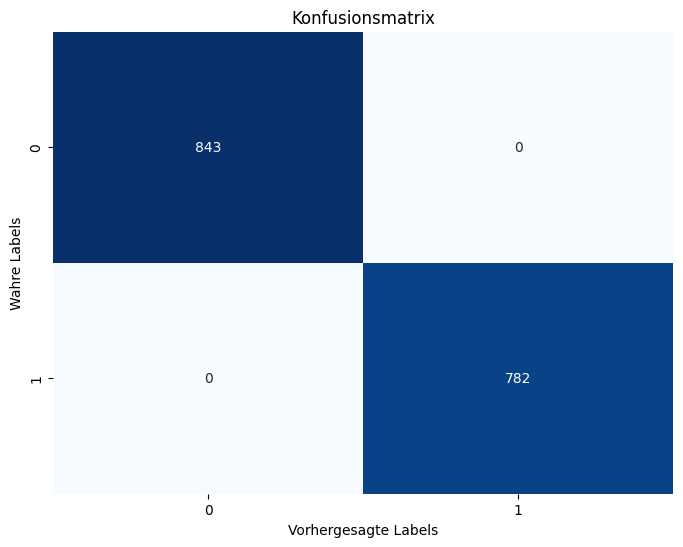

In [29]:
# Konfusionsmatrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Vorhergesagte Labels')
plt.ylabel('Wahre Labels')
plt.title('Konfusionsmatrix')
plt.show()